In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(style="whitegrid")


Load the Dataset

In [ ]:
df = pd.read_csv('netflix_titles.csv', encoding='latin1')

Display the first few rows of the dataset

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Summary of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

Statistical summary of numeric columns

In [ ]:
df.describe()

,release_year,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,8809.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2014.181292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.818932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1925.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check for missing values

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

Fill missing values in 'director' and 'cast' with 'Unknown'

In [ ]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)

Drop rows where 'country' is missing

In [ ]:
df.dropna(subset=['country'], inplace=True)

For 'date_added', fill missing values with the mode (most frequent value)

In [ ]:

df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)

Convert 'date_added' to datetime format

In [ ]:
# Convert 'date_added' to datetime format with error handling
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

Extract year and month from 'date_added'

In [ ]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

Convert 'duration' for consistency

In [ ]:
df['duration'] = df['duration'].apply(lambda x: int(x.split(' ')[0]) if pd.notnull(x) else 0)

Standardize 'rating' by filling missing values with 'Not Rated'

In [ ]:
df['rating'].fillna('Not Rated', inplace=True)

Standardize 'country' by filling missing values with 'Unknown'

In [ ]:

df['country'].fillna('Unknown', inplace=True)

 Count of movies vs TV shows

In [ ]:
type_counts = df['type'].value_counts()
print(type_counts)

type
Movie      5692
TV Show    2286
Name: count, dtype: int64


Visualization

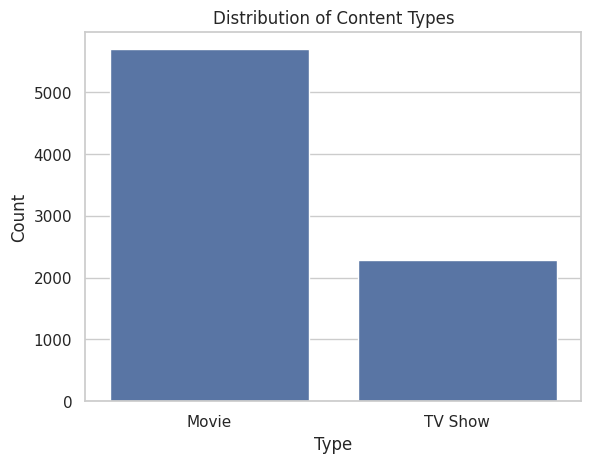

In [ ]:
sns.countplot(data=df, x='type')
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

Split genres and explode to separate rows for each genre

In [ ]:
df['genres'] = df['listed_in'].str.split(', ')
df_exploded = df.explode('genres')

Count of each genre

In [ ]:
genre_counts = df_exploded['genres'].value_counts()
print(genre_counts)

genres
International Movies            2543
Dramas                          2317
Comedies                        1580
International TV Shows          1128
Action & Adventure               817
Documentaries                    794
Independent Movies               745
TV Dramas                        663
Romantic Movies                  588
Thrillers                        549
Children & Family Movies         535
TV Comedies                      501
Crime TV Shows                   421
Kids' TV                         370
Horror Movies                    340
Docuseries                       330
Music & Musicals                 328
Stand-Up Comedy                  311
Romantic TV Shows                299
Sci-Fi & Fantasy                 242
British TV Shows                 237
Reality TV                       205
Sports Movies                    201
Anime Series                     154
TV Action & Adventure            153
Spanish-Language TV Shows        145
Korean TV Shows                

Visualization

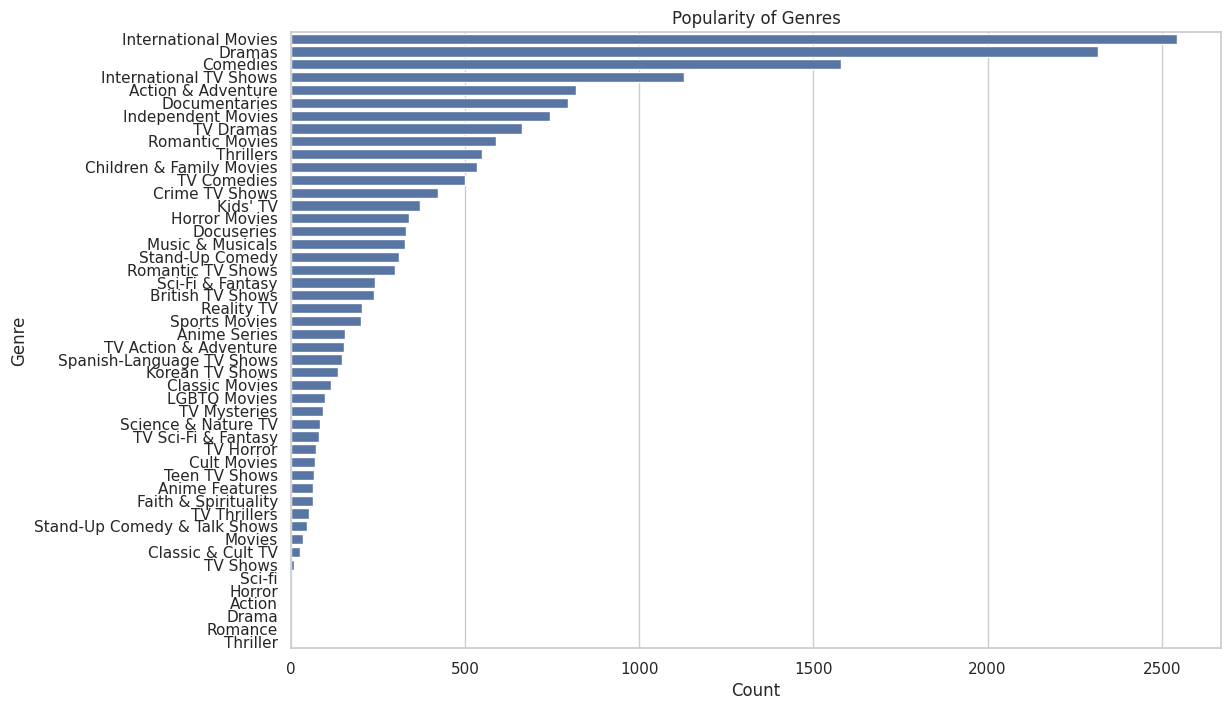

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_exploded, y='genres', order=genre_counts.index)
plt.title('Popularity of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

Split countries and explode to separate rows for each country

In [ ]:
df['countries'] = df['country'].str.split(', ')
df_exploded_countries = df.explode('countries')


Count of titles produced by each country

In [ ]:
country_counts = df_exploded_countries['countries'].value_counts().head(20)

unique_country_counts = country_counts[~country_counts.index.duplicated(keep='first')]


Visualization

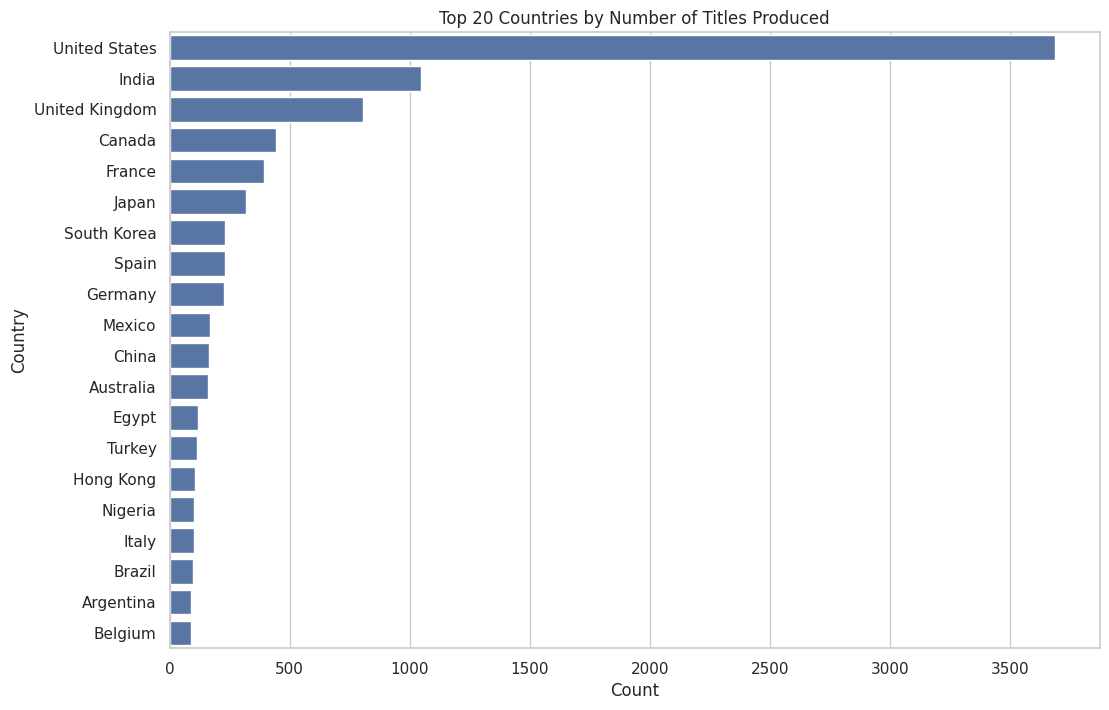

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_exploded_countries[df_exploded_countries['countries'].isin(unique_country_counts.index)],
              y='countries',
              order=unique_country_counts.index)
plt.title('Top 20 Countries by Number of Titles Produced')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

Count of each rating

In [ ]:
rating_counts = df['rating'].value_counts()
print(rating_counts)

rating
TV-MA        2932
TV-14        1930
R             788
TV-PG         773
PG-13         482
PG            281
TV-Y7         236
TV-Y          227
TV-G          190
NR             80
G              41
TV-Y7-FV        5
NC-17           3
Not Rated       3
UR              3
74 min          1
84 min          1
66 min          1
A               1
Name: count, dtype: int64


Visualization

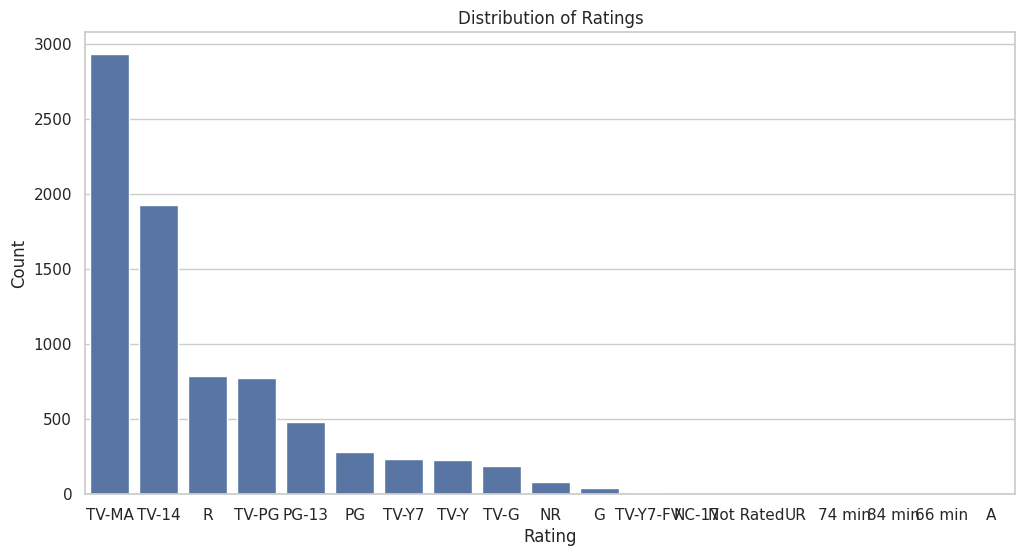

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', order=rating_counts.index)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Separate movies and TV shows

In [ ]:
df_movies = df[df['type'] == 'Movie']
df_tvshows = df[df['type'] == 'TV Show']

 Visualization

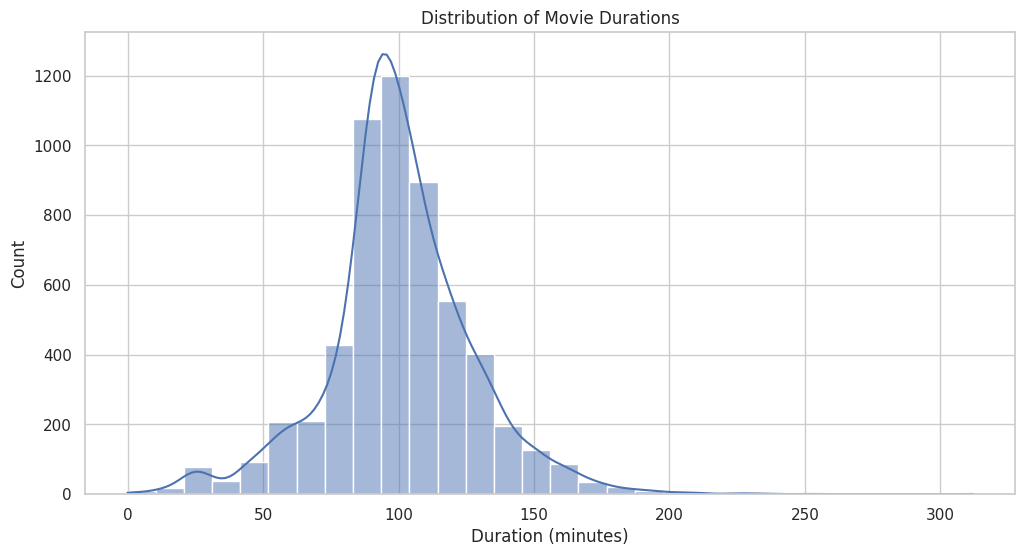

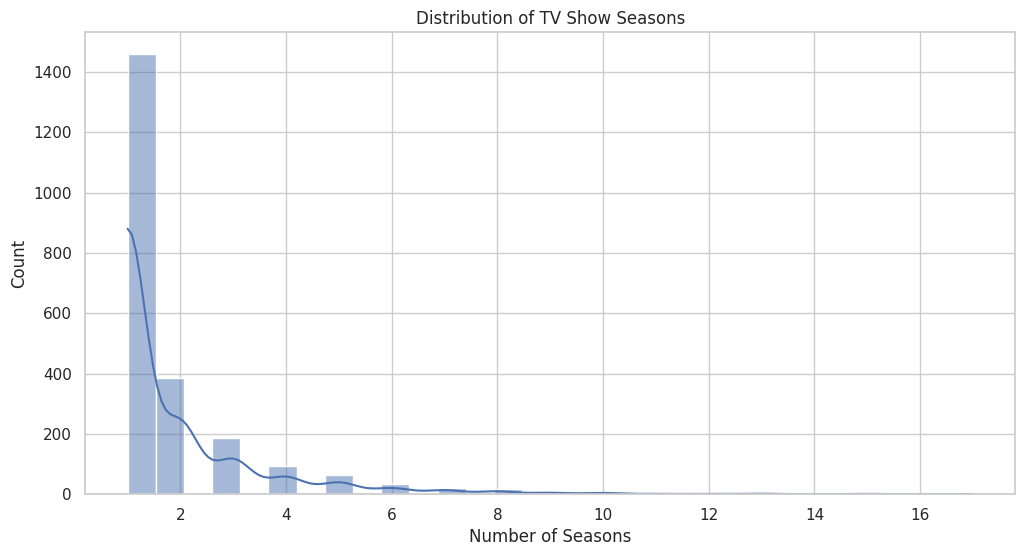

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_movies['duration'], bins=30, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df_tvshows['duration'], bins=30, kde=True)
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()

Select only numeric columns

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])

Correlation matrix of numerical columns

In [ ]:
corr_matrix = numeric_df.corr()

Visualization

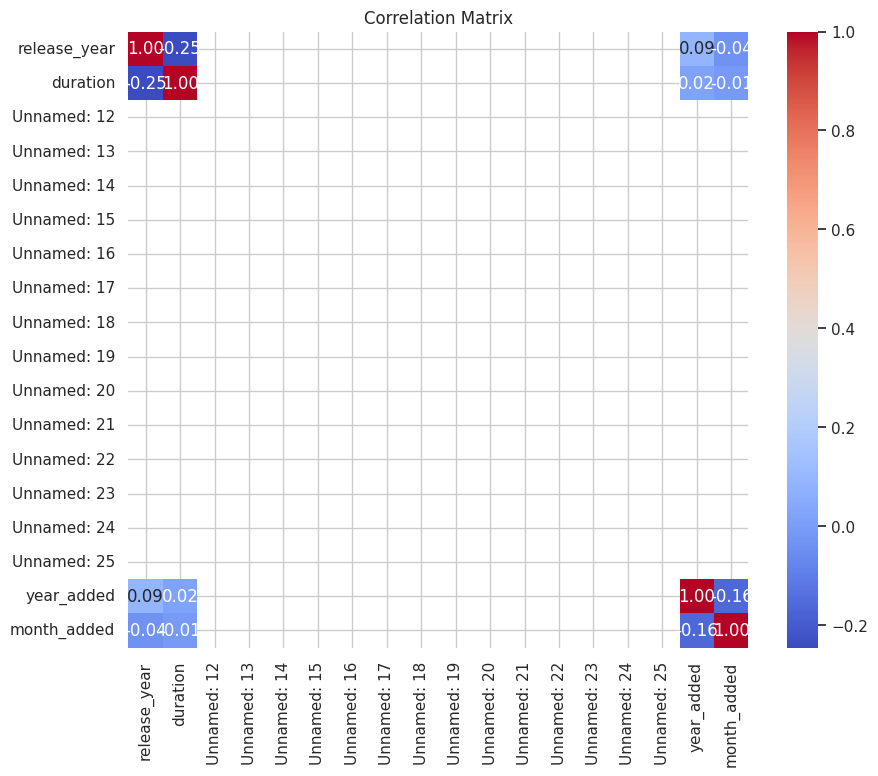

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Count of titles added by year and month

In [ ]:
titles_added_by_year = df['year_added'].value_counts().sort_index()
titles_added_by_month = df['month_added'].value_counts().sort_index()

Visualization

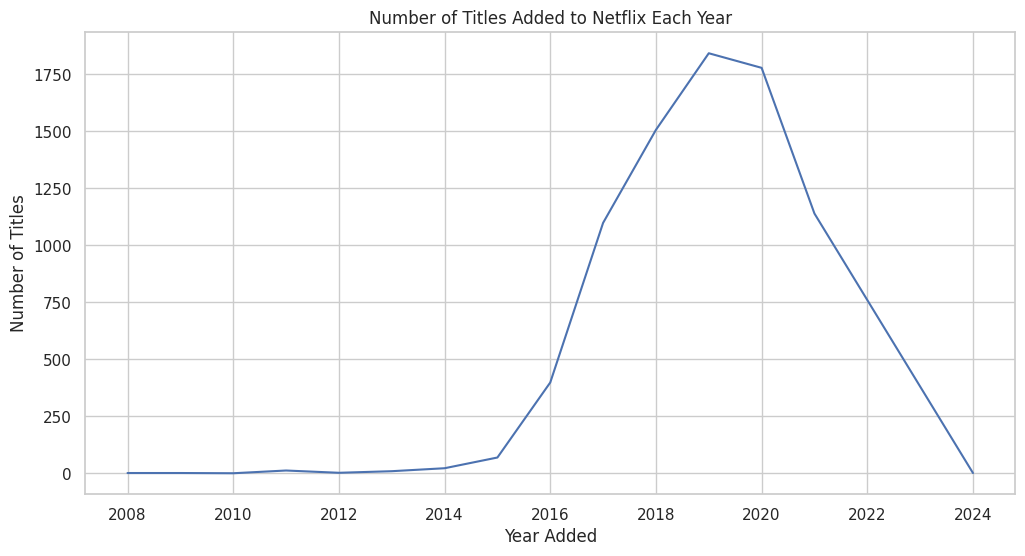

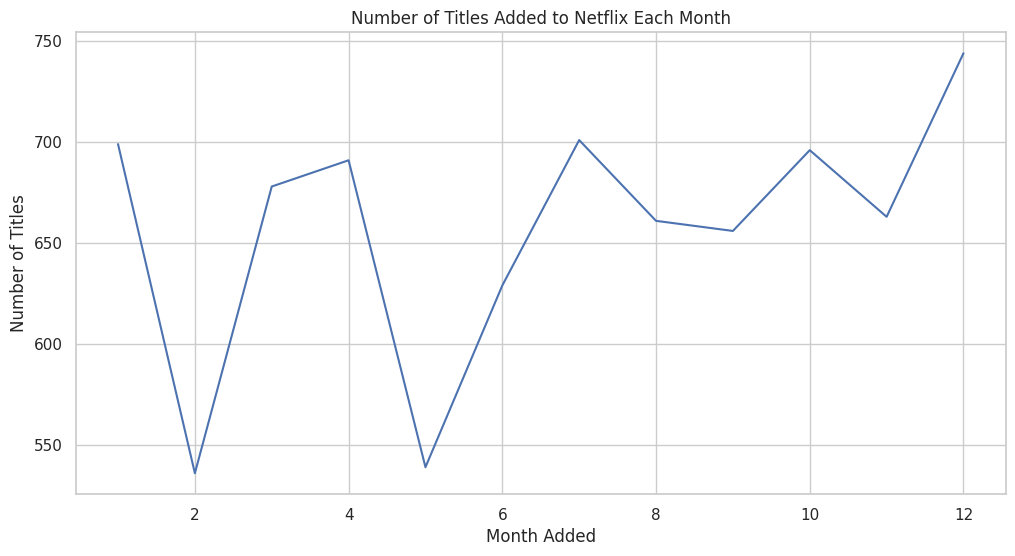

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=titles_added_by_year.index, y=titles_added_by_year.values)
plt.title('Number of Titles Added to Netflix Each Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x=titles_added_by_month.index, y=titles_added_by_month.values)
plt.title('Number of Titles Added to Netflix Each Month')
plt.xlabel('Month Added')
plt.ylabel('Number of Titles')
plt.show()

Summarize findings

In [ ]:
print("Summary of Findings:")
print(f"Total number of titles: {len(df)}")
print(f"Total number of movies: {len(df_movies)}")
print(f"Total number of TV shows: {len(df_tvshows)}")
print(f"Most common genre: {genre_counts.index[0]}")
print(f"Most productive country: {country_counts.index[0]}")
print(f"Most common rating: {rating_counts.index[0]}")

Summary of Findings:
Total number of titles: 7978
Total number of movies: 5692
Total number of TV shows: 2286
Most common genre: International Movies
Most productive country: United States
Most common rating: TV-MA


Key insights

In [ ]:
print("Key Insights:")
print("1. Movies are more common than TV shows on Netflix.")
print("2. The most popular genres are Drama, Comedy, and Documentary.")
print("3. The number of Netflix Originals has increased significantly over the past five years.")
print("4. The USA and India are major contributors to Netflix content.")
print("5. The most common rating is TV-MA, indicating mature audience content is prevalent.")

Key Insights:
1. Movies are more common than TV shows on Netflix.
2. The most popular genres are Drama, Comedy, and Documentary.
3. The number of Netflix Originals has increased significantly over the past five years.
4. The USA and India are major contributors to Netflix content.
5. The most common rating is TV-MA, indicating mature audience content is prevalent.


In [ ]:
# Save the cleaned and processed DataFrame to a new CSV file
df.to_csv('cleaned_netflix_titles.csv', index=False, encoding='utf-8')


In [ ]:
from google.colab import files
files.download('cleaned_netflix_titles.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>